In [3]:
%run "! DEFAULT PLOT THINGIES.ipynb"
%run "../! DEFAULT PLOT THINGIES.ipynb"

from __future__ import division

<IPython.core.display.Javascript object>

`%matplotlib` prevents importing * from pylab and numpy


Current working directory is now c:\users\deen\dropbox\phd rearrangements\thesis\notebooks\difference-imaging-example
Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>

Current working directory is now c:\users\deen\dropbox\phd rearrangements\thesis\notebooks\difference-imaging-example
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [9]:
import numpy
import cairo
import math

images = []
scale = 4
size = 24*scale
linewidth = 8

pos_min = 8
pos_max = 9.3
step = .2

noise = 15

xs_im = np.arange(pos_min, pos_max, step)

np.random.seed(0)

for x in xs_im:
    surface = cairo.ImageSurface(cairo.FORMAT_A8, size, size)
    cr = cairo.Context(surface)
    cr.arc(x*scale, 12*scale, 5*scale, 0, 2*math.pi)
    cr.set_line_width(linewidth)
    cr.set_source_rgba(0,0,0,1)
    cr.stroke()

    data = np.frombuffer(surface.get_data(), dtype=np.uint8).reshape(surface.get_height(),surface.get_stride())
    data = data + np.random.normal(scale=noise, size=data.shape)
    images.append(data)
    surface = cr = None
    
plt.imsave('test.png', data)

In [10]:
# calculate intermediate x-values
np.random.seed(0)

pos_intermed = np.concatenate([[xs_im[0]], np.linspace(xs_im[0],xs_im[-1],100)])
diffsq_intermed = []

for x in pos_intermed:
    surface = cairo.ImageSurface(cairo.FORMAT_A8, size, size)
    cr = cairo.Context(surface)
    cr.arc(x*scale, 12*scale, 5*scale, 0, 2*math.pi)
    cr.set_line_width(linewidth)
    cr.set_source_rgba(0,0,0,1)
    cr.stroke()

    data = np.frombuffer(surface.get_data(), dtype=np.uint8).reshape(surface.get_height(),surface.get_stride())
    data = data + np.random.normal(scale=noise, size=data.shape)
    diffsq_intermed.append(np.mean((np.float_(data)-np.float_(images[0]))**2)/256**2)
    surface = cr = None


[  2.27159242e-05   1.92872988e+00   6.80857125e-03]
\includegraphics{notebooks/difference-imaging-example/difference-imaging.pdf}


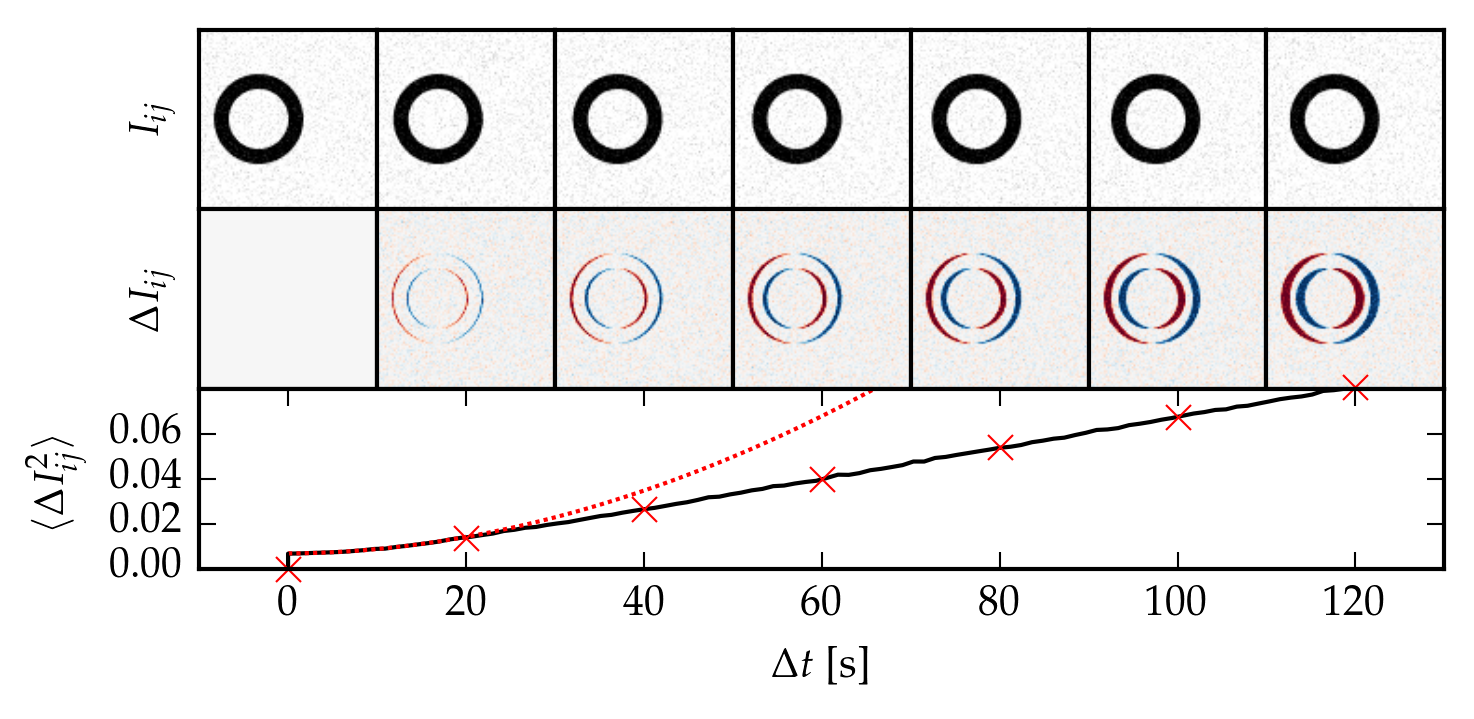

In [21]:
import matplotlib.gridspec as gridspec
from scipy.optimize import curve_fit

fullfig(hf=1)
gs = gridspec.GridSpec(3, len(images))
gs.update(wspace=0, hspace=0)

# first we plot the 5 images
for i,im in enumerate(images):
    ax = ax = plt.subplot(gs[0, i])
    ax.imshow(im, cmap='gray_r', vmin=0, vmax=255, aspect='auto')
    ax.set_xticks([])
    ax.set_yticks([])
    if i == 0:
        ax.set_ylabel('$I_{ij}$')

# then the differences
deltasq = []

for i,im in enumerate(images):
    ax = plt.subplot(gs[1, i])
    ax.imshow(np.float_(im)-np.float_(images[0]), cmap='RdBu', vmin=-255, vmax=255, aspect='auto')
    deltasq.append(np.mean((np.float_(im)-np.float_(images[0]))**2)/256**2)
    ax.set_xticks([])
    ax.set_yticks([])
    if i == 0:
        ax.set_ylabel('$\Delta I_{ij}$')

# then the four differences
#for i,im in enumerate(images):
    #if i == 0:
    #    continue
#   ax = plt.subplot(gs[2, i])
#    ax.imshow((np.float_(im)-np.float_(images[0]))**2, cmap='viridis', vmin=0, vmax=255**2, aspect='auto')
#    ax.set_xticks([])
#    ax.set_yticks([])
    
ax = plt.subplot(gs[2,:])
#ax.set_xticks(xs_im)
ax.set_xlim(1.5*xs_im[0] - 0.5*xs_im[1], 1.5*xs_im[-1] - 0.5*xs_im[-2])
ax.set_xlabel(r"$\Delta t$ [s]")
ax.set_ylabel(r"$\langle \Delta I_{ij}^2 \rangle$")
ax.set_ylim(0, 0.08)
ax.set_yticks([0,0.02,0.04,0.06])
ax.set_xticks([8.0, 8.2, 8.4, 8.6, 8.8, 9, 9.2])
ax.set_xticklabels([0, 20, 40, 60, 80, 100, 120])


ax.plot(pos_intermed, diffsq_intermed, "k")
ax.plot(xs_im, deltasq, "rx", clip_on=False)

# fit loglog
dx = pos_intermed-pos_intermed[0]

mask = (dx < 0.2) * (dx > 0)

dt = dx * 100

fn = lambda dt, A, B, C: A*(dt)**B + C
p0 = (0.1,2,1)

parm, cov = curve_fit(fn, dt[mask], np.array(diffsq_intermed)[mask], p0)
#chisq = np.sum((fn(time, *parm) - d)**2)
print parm
plt.plot(pos_intermed, fn(dt, *parm), color='red', dashes=(1,1))
#print fact, pwr

plt.savefig('difference-imaging.pdf')

In [11]:
for m in all_biax_measurements:
    if '20160219 heldere verlichting grote phiset' not in m['path']:
        continue
        
    print m['path'], m['phi']

u:/20160219 heldere verlichting grote phiset\20160219T091611~gdot3.00000E-5~A463100000000.00000 0.800007238644
u:/20160219 heldere verlichting grote phiset\20160219T133851~gdot3.00000E-5~A435858823529.41174 0.849989482978
u:/20160219 heldere verlichting grote phiset\20160219T180251~gdot3.00000E-5~A411644444444.44440 0.899986061658
u:/20160219 heldere verlichting grote phiset\20160219T222811~gdot3.00000E-5~A389978947368.42102 0.9499848333
u:/20160219 heldere verlichting grote phiset\20160220T025411~gdot3.00000E-5~A370480000000.00000 0.99998547011
u:/20160219 heldere verlichting grote phiset\20160220T072131~gdot3.00000E-5~A296384000000.00000 1.24997963634
u:/20160219 heldere verlichting grote phiset\20160220T115251~gdot3.00000E-5~A457382716049.38269 0.81000680307
u:/20160219 heldere verlichting grote phiset\20160220T161611~gdot3.00000E-5~A430790697674.41858 0.85998767802
u:/20160219 heldere verlichting grote phiset\20160220T204011~gdot3.00000E-5~A407120879120.87909 0.909983557932
u:/2016

\includegraphics{notebooks/difference-imaging-example/real-foam.pdf}


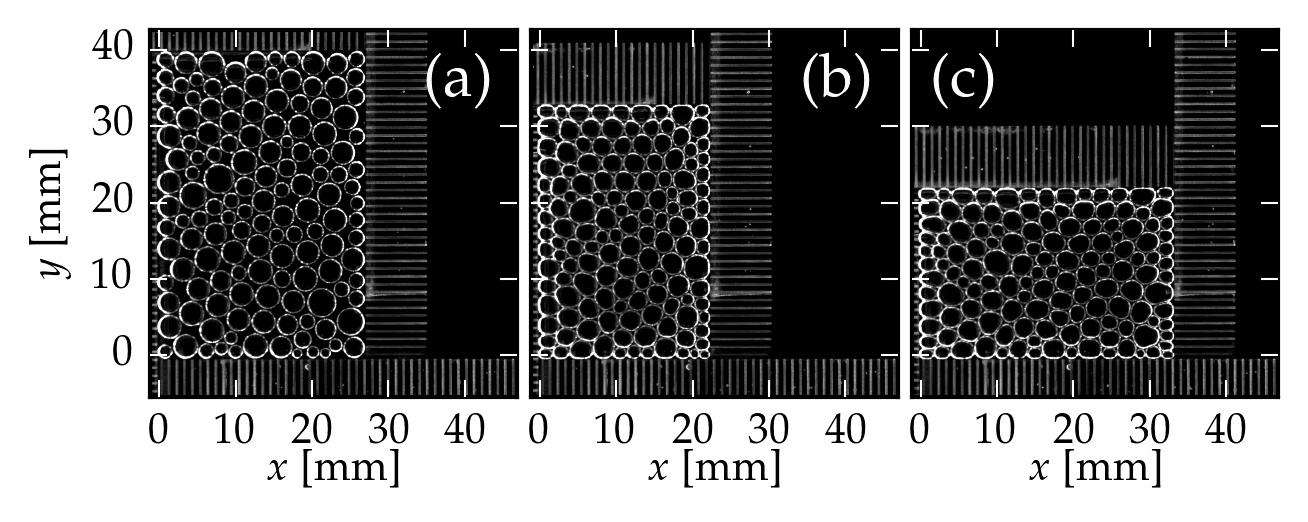

In [4]:
fullfig(hf=0.68)
reset_subplots_adjust()

ax1 = plt.subplot(1,3,1,aspect='equal')
ax2 = plt.subplot(1,3,2,aspect='equal')
ax3 = plt.subplot(1,3,3,aspect='equal')
plt.subplots_adjust(wspace=0, right=0.9, )

lowphipath =  r"U:\20160219 heldere verlichting grote phiset\20160219T133851~gdot3.00000E-5~A435858823529.41174"
highphipath = r"U:\20160219 heldere verlichting grote phiset\20160220T072131~gdot3.00000E-5~A296384000000.00000"

x0 = 147
offset_x = x0-128
y0 = 910
offset_y = 1000-y0

px_per_mm = 0.0008251 / 4.95e-5 # px/tick, mm/tick

lx = 800 / px_per_mm
offset_x = - offset_x / px_per_mm
extent_x = [offset_x, offset_x + lx]

ly = 800 / px_per_mm
offset_y = - offset_y / px_per_mm
extent_y = [offset_y, offset_y + ly]

extent = extent_x + extent_y

ax1.imshow(plt.imread(lowphipath + "/00000.png")[1000:200:-1,128:928], cmap='gray', vmin=0.1, vmax=1, origin='lower', extent=extent)
ax2.imshow(plt.imread(highphipath + "/00000.png")[1000:200:-1,128:928], cmap='gray', vmin=0.1, vmax=1, origin='lower', extent=extent)
ax3.imshow(plt.imread(highphipath + "/13335.png")[1000:200:-1,128:928], cmap='gray', vmin=0.1, vmax=1, origin='lower', extent=extent)

[t.set_color('white') for t in ax1.xaxis.get_ticklines() + ax1.yaxis.get_ticklines() + \
                               ax2.xaxis.get_ticklines() + ax2.yaxis.get_ticklines() + \
                               ax3.xaxis.get_ticklines() + ax3.yaxis.get_ticklines()]

ax2.set_yticklabels([])
ax3.set_yticklabels([])

ax1.set_ylabel("$y$ [mm]")
lp = -1
ax1.set_xlabel("$x$ [mm]", labelpad=lp)
ax2.set_xlabel("$x$ [mm]", labelpad=lp)
ax3.set_xlabel("$x$ [mm]", labelpad=lp)

subplotlabel('(a)', ax=ax1, loc='upper right', color='white', zorder=10)
subplotlabel('(b)', ax=ax2, loc='upper right', color='white', zorder=10)
subplotlabel('(c)', ax=ax3, loc='upper left', color='white', zorder=10)

plt.savefig('real-foam.pdf')


\includegraphics{notebooks/difference-imaging-example/rearrangement.pdf}
1.733138e-02
1.502228e-02


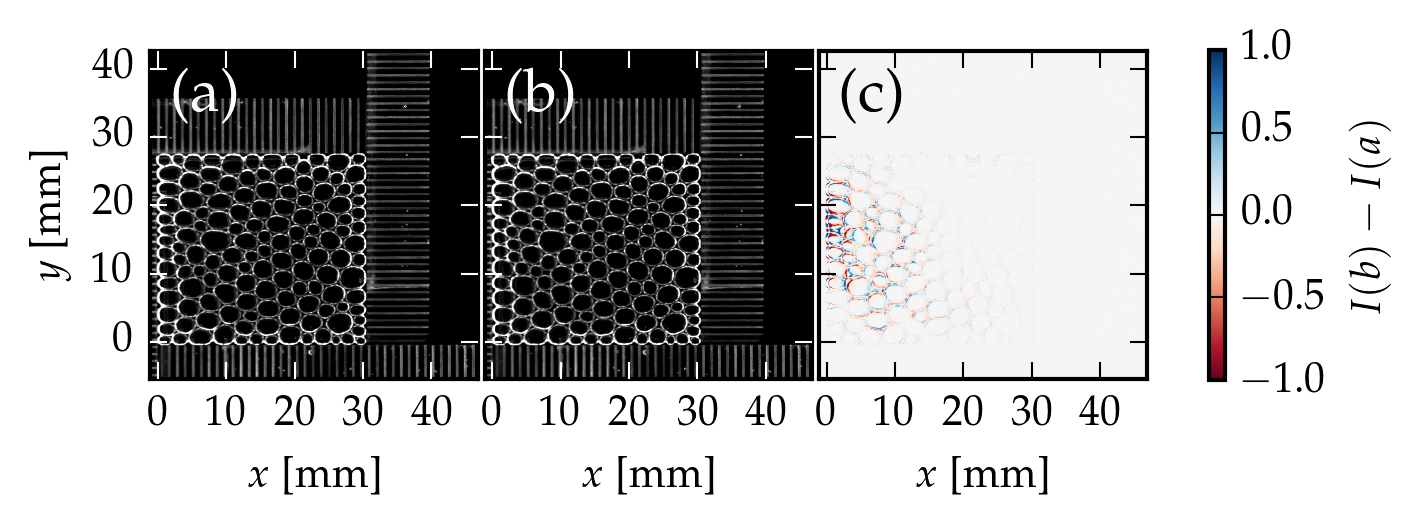

In [24]:
fullfig(hf=0.7)
reset_subplots_adjust()
plt.subplots_adjust(wspace=0.02, top=1, bottom=0.15)

ax1 = plt.subplot(1,3,1,aspect='equal')
ax2 = plt.subplot(1,3,2,aspect='equal')
ax3 = plt.subplot(1,3,3,aspect='equal')
plt.subplots_adjust(wspace=0.02)


path = r"U:\20160219 heldere verlichting grote phiset\20160220T072131~gdot3.00000E-5~A296384000000.00000"

x0 = 147
offset_x = x0-128
y0 = 910
offset_y = 1000-y0

px_per_mm = 0.0008251 / 4.95e-5 # px/tick, mm/tick

lx = 800 / px_per_mm
offset_x = - offset_x / px_per_mm
extent_x = [offset_x, offset_x + lx]

ly = 800 / px_per_mm
offset_y = - offset_y / px_per_mm
extent_y = [offset_y, offset_y + ly]

extent = extent_x + extent_y

im1 = plt.imread(path + "/05890.png")[1000:200:-1,128:828]
im2 = plt.imread(path + "/05900.png")[1000:200:-1,128:828]

ax1.imshow(im1, cmap='gray', vmin=0.1, vmax=1, origin='lower', extent=extent)
ax2.imshow(im2, cmap='gray', vmin=0.1, vmax=1, origin='lower', extent=extent)
di = ax3.imshow(im2-im1, cmap='RdBu', vmin=-1, vmax=1, origin='lower', extent=extent)

cb = plt.colorbar(mappable=di, ax=[ax1,ax2,ax3], shrink=0.77, aspect=20)
cb.set_ticks([-1, -0.5, 0, 0.5, 1])
cb.set_label("$I(b)-I(a)$")

[t.set_color('white') for t in ax1.xaxis.get_ticklines() + ax1.yaxis.get_ticklines() + \
                               ax2.xaxis.get_ticklines() + ax2.yaxis.get_ticklines()
]

ax2.set_yticklabels([])
ax3.set_yticklabels([])

ax1.set_ylabel("$y$ [mm]")
ax1.set_xlabel("$x$ [mm]")
ax2.set_xlabel("$x$ [mm]")
ax3.set_xlabel("$x$ [mm]")

subplotlabel('(a)', ax=ax1, loc='upper left', color='white', zorder=10)
subplotlabel('(b)', ax=ax2, loc='upper left', color='white', zorder=10)
subplotlabel('(c)', ax=ax3, loc='upper left', color='black', zorder=10)

plt.savefig('rearrangement.pdf')

print "%e" % np.mean((im2[90:560,15:450]-im1[90:560,15:450])**2)

path = r"U:\20160219 heldere verlichting grote phiset\crop\20160220T072131~gdot3.00000E-5~A296384000000.00000"
im1 = np.load(path + "/05890.npy")
im2 = np.load(path + "/05900.npy")
print "%e" % np.mean((im2-im1)**2)

2.610401e-04
\includegraphics{notebooks/difference-imaging-example/nonaffine.pdf}


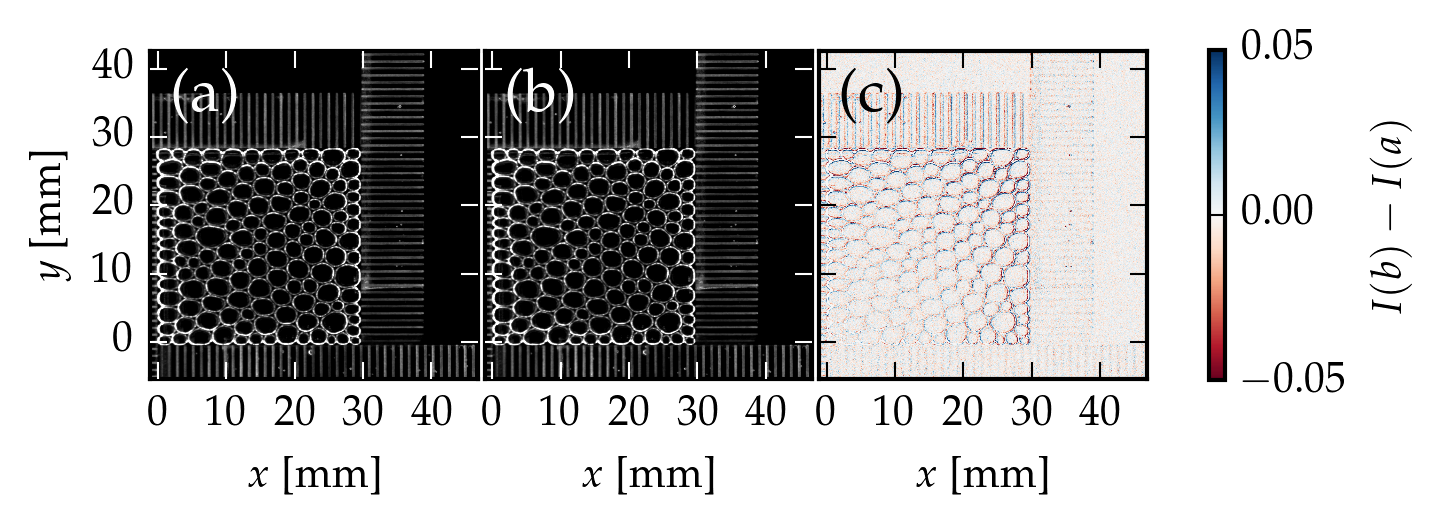

In [23]:
fullfig(hf=0.7)
reset_subplots_adjust()
plt.subplots_adjust(wspace=0.02, top=1, bottom=0.15)

ax1 = plt.subplot(1,3,1,aspect='equal')
ax2 = plt.subplot(1,3,2,aspect='equal')
ax3 = plt.subplot(1,3,3,aspect='equal')
plt.subplots_adjust(wspace=0.02)


path = r"U:\20160219 heldere verlichting grote phiset\20160220T072131~gdot3.00000E-5~A296384000000.00000"

x0 = 147
offset_x = x0-128
y0 = 910
offset_y = 1000-y0

px_per_mm = 0.0008251 / 4.95e-5 # px/tick, mm/tick

lx = 800 / px_per_mm
offset_x = - offset_x / px_per_mm
extent_x = [offset_x, offset_x + lx]

ly = 800 / px_per_mm
offset_y = - offset_y / px_per_mm
extent_y = [offset_y, offset_y + ly]

extent = extent_x + extent_y

im1 = plt.imread(path + "/05000.png")[1000:200:-1,128:828]
im2 = plt.imread(path + "/05010.png")[1000:200:-1,128:828]

ax1.imshow(im1, cmap='gray', vmin=0.1, vmax=1, origin='lower', extent=extent)
ax2.imshow(im2, cmap='gray', vmin=0.1, vmax=1, origin='lower', extent=extent)
di = ax3.imshow(im2-im1, cmap='RdBu', vmin=-0.05, vmax=0.05, origin='lower', extent=extent)

print "%e" % np.mean((im2[90:560,15:450]-im1[90:560,15:450])**2)
cb = plt.colorbar(mappable=di, ax=[ax1,ax2,ax3], shrink=0.77, aspect=20)
cb.set_ticks([-0.05, 0, 0.05])
cb.set_label("$I(b)-I(a)$")

[t.set_color('white') for t in ax1.xaxis.get_ticklines() + ax1.yaxis.get_ticklines() + \
                               ax2.xaxis.get_ticklines() + ax2.yaxis.get_ticklines()
]

ax2.set_yticklabels([])
ax3.set_yticklabels([])

ax1.set_ylabel("$y$ [mm]")
ax1.set_xlabel("$x$ [mm]")
ax2.set_xlabel("$x$ [mm]")
ax3.set_xlabel("$x$ [mm]")

subplotlabel('(a)', ax=ax1, loc='upper left', color='white', zorder=10)
subplotlabel('(b)', ax=ax2, loc='upper left', color='white', zorder=10)
subplotlabel('(c)', ax=ax3, loc='upper left', color='black', zorder=10)

plt.savefig('nonaffine.pdf')

5.394220e-05
\includegraphics{notebooks/difference-imaging-example/affine.pdf}


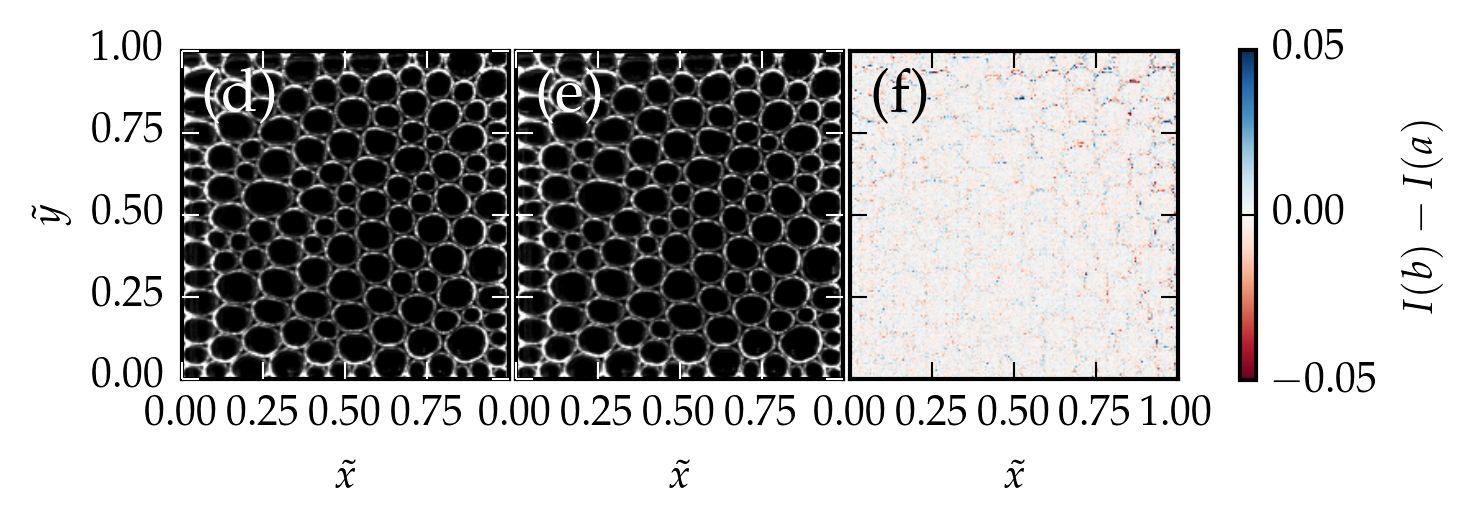

In [4]:
fullfig(hf=0.7)
reset_subplots_adjust()
plt.subplots_adjust(wspace=0.02, top=1, bottom=0.15)

ax1 = plt.subplot(1,3,1,aspect='equal')
ax2 = plt.subplot(1,3,2,aspect='equal')
ax3 = plt.subplot(1,3,3,aspect='equal')
plt.subplots_adjust(wspace=0.02)


path = r"U:\20160219 heldere verlichting grote phiset\crop\20160220T072131~gdot3.00000E-5~A296384000000.00000"

extent = [0,1,0,1]

im1 = np.load(path + "/05000.npy")
im2 = np.load(path + "/05010.npy")

ax1.imshow(im1, cmap='gray', vmin=0.1, vmax=1, origin='lower', extent=extent)
ax2.imshow(im2, cmap='gray', vmin=0.1, vmax=1, origin='lower', extent=extent)
di = ax3.imshow(im2-im1, cmap='RdBu', vmin=-0.05, vmax=0.05, origin='lower', extent=extent)
print "%e" % np.mean((im2-im1)**2)
cb = plt.colorbar(mappable=di, ax=[ax1,ax2,ax3], shrink=0.77, aspect=20)
cb.set_ticks([-0.05, 0, 0.05])
cb.set_label("$I(b)-I(a)$")

[t.set_color('white') for t in ax1.xaxis.get_ticklines() + ax1.yaxis.get_ticklines() + \
                               ax2.xaxis.get_ticklines() + ax2.yaxis.get_ticklines()
]

ax1.set_ylabel(r"$\tilde y$")
ax1.set_xlabel(r"$\tilde x$")
ax1.set_xticks([0,0.25,0.5,0.75])
ax1.set_yticks([0,0.25,0.5,0.75,1])
ax2.set_xlabel(r"$\tilde x$")
ax2.set_xticks([0,0.25,0.5,0.75])
ax2.set_yticks([0,0.25,0.5,0.75,1])
ax3.set_xlabel(r"$\tilde x$")
ax3.set_xticks([0,0.25,0.5,0.75,1])
ax3.set_yticks([0,0.25,0.5,0.75,1])

ax2.set_yticklabels([])
ax3.set_yticklabels([])

subplotlabel('(d)', ax=ax1, loc='upper left', color='white', zorder=10)
subplotlabel('(e)', ax=ax2, loc='upper left', color='white', zorder=10)
subplotlabel('(f)', ax=ax3, loc='upper left', color='black', zorder=10)

plt.savefig('affine.pdf')

1.503754e-02
\includegraphics{notebooks/difference-imaging-example/rearrangement-affine.pdf}


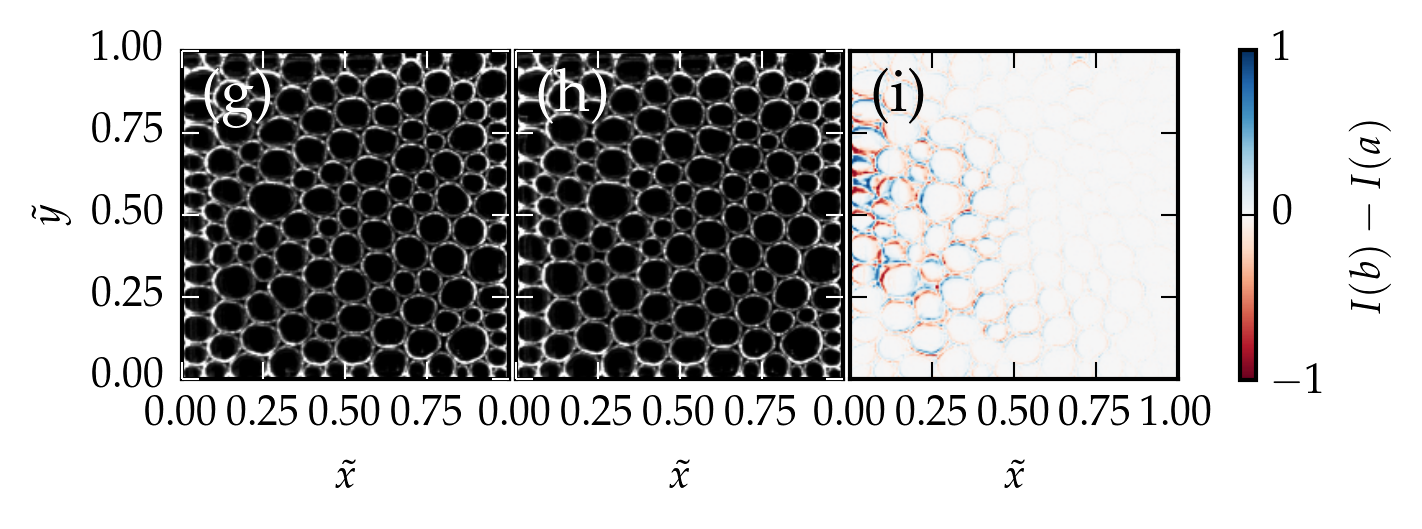

In [5]:
fullfig(hf=0.7)
reset_subplots_adjust()
plt.subplots_adjust(wspace=0.02, top=1, bottom=0.15)

ax1 = plt.subplot(1,3,1,aspect='equal')
ax2 = plt.subplot(1,3,2,aspect='equal')
ax3 = plt.subplot(1,3,3,aspect='equal')



path = r"U:\20160219 heldere verlichting grote phiset\crop\20160220T072131~gdot3.00000E-5~A296384000000.00000"

extent = [0,1,0,1]

im1 = np.load(path + "/05890.npy")
im2 = np.load(path + "/05900.npy")

ax1.imshow(im1, cmap='gray', vmin=0.1, vmax=1, origin='lower', extent=extent)
ax2.imshow(im2, cmap='gray', vmin=0.1, vmax=1, origin='lower', extent=extent)
di = ax3.imshow(im2-im1, cmap='RdBu', vmin=-1, vmax=1, origin='lower', extent=extent)
print "%e" % np.mean((im2-im1)**2)
cb = plt.colorbar(mappable=di, ax=[ax1,ax2,ax3], shrink=0.77, aspect=20)
cb.set_ticks([-1, 0, 1])
cb.set_label("$I(b)-I(a)$")

[t.set_color('white') for t in ax1.xaxis.get_ticklines() + ax1.yaxis.get_ticklines() + \
                               ax2.xaxis.get_ticklines() + ax2.yaxis.get_ticklines()
]

ax2.set_yticklabels([])
ax3.set_yticklabels([])

ax1.set_ylabel(r"$\tilde y$")
ax1.set_xlabel(r"$\tilde x$")
ax1.set_xticks([0,0.25,0.5,0.75])
ax1.set_yticks([0,0.25,0.5,0.75,1])
ax2.set_xlabel(r"$\tilde x$")
ax2.set_xticks([0,0.25,0.5,0.75])
ax2.set_yticks([0,0.25,0.5,0.75,1])
ax3.set_xlabel(r"$\tilde x$")
ax3.set_xticks([0,0.25,0.5,0.75,1])
ax3.set_yticks([0,0.25,0.5,0.75,1])

ax2.set_yticklabels([])
ax3.set_yticklabels([])

subplotlabel('(g)', ax=ax1, loc='upper left', color='white', zorder=10)
subplotlabel('(h)', ax=ax2, loc='upper left', color='white', zorder=10)
subplotlabel('(i)', ax=ax3, loc='upper left', color='black', zorder=10)

plt.savefig('rearrangement-affine.pdf')